In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

clasificadores = ['Benigno','maligno']
dataframe = pd.read_csv('DSCancerDeMamaSinDatosPerdidos.csv',sep=';')

In [6]:
dataframe

,BIRADS,AGE,shape,MARGIN,DENSITY,RESULT
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1
...,...,...,...,...,...,...
815,4,47,2,1,3,0
816,4,56,4,5,3,1
817,4,64,4,5,3,0
818,5,66,4,5,3,1


In [9]:
dataframe.head(10)

,BIRADS,AGE,shape,MARGIN,DENSITY,RESULT
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1
5,3,42,2,1,3,1
6,4,36,3,1,2,0
7,4,60,2,1,2,0
8,4,54,1,1,3,0
9,3,52,3,4,3,0


In [11]:
dataframe.groupby('RESULT').size()

RESULT
0    425
1    395
dtype: int64

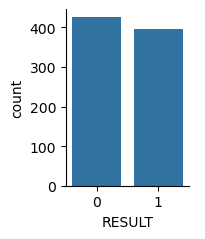

In [13]:
sb.catplot(x = 'RESULT',data=dataframe,kind="count",height=2.5,aspect=.8)

In [15]:
y=dataframe['RESULT']
x=dataframe.drop('RESULT',axis=1)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)

from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=5)

#Entrenar el algoritmo
knn_mm.fit(x_train,y_train)
predicciones = knn_mm.predict(x_test)

         Benigno  Maligno
Benigno      104       15
Maligno       27      100
104 15 27 100
              precision    recall  f1-score   support

     Benigno       0.79      0.87      0.83       119
     maligno       0.87      0.79      0.83       127

    accuracy                           0.83       246
   macro avg       0.83      0.83      0.83       246
weighted avg       0.83      0.83      0.83       246



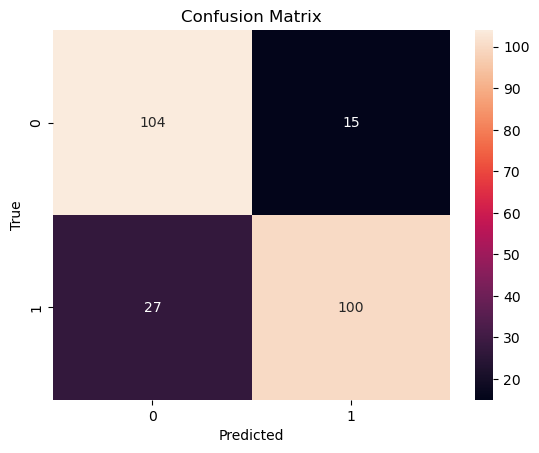

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,predicciones).ravel()

labels = ["Benigno","Maligno"]
matriz = confusion_matrix(y_test,predicciones, labels=[0,1])
print(pd.DataFrame(matriz, index = labels, columns = labels))


print(tn, fp, fn, tp)
sb.heatmap(confusion_matrix(y_test,predicciones), annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(y_test,predicciones,target_names=clasificadores))

In [75]:
#BIRADS	Edad	Forma	Margen	Densidad
print(knn_mm.predict([[4,65,3,5,3]]))
print(knn_mm.predict_proba([[4,65,3,5,3]]))

[1]
[[0.4 0.6]]


C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


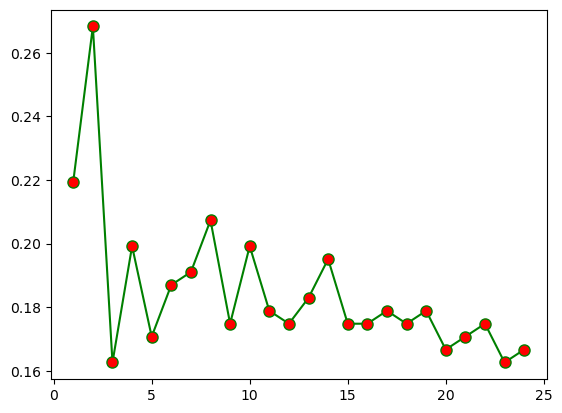

In [77]:
# Evaluar vecino óptimo
tasa_error = []
for i in range(1,25):
    knn_mm = KNeighborsClassifier(n_neighbors=i)
    knn_mm.fit(x_train,y_train)
    prediccion_i = knn_mm.predict(x_test)
    tasa_error.append(np.mean(prediccion_i != y_test))

valores = range(1,25)
plt.plot(valores, tasa_error, color='green', marker='o', markerfacecolor='red', markersize='8')

         Benigno  Maligno
Benigno      105       14
Maligno       26      101
105 14 26 101
              precision    recall  f1-score   support

     Benigno       0.80      0.88      0.84       119
     maligno       0.88      0.80      0.83       127

    accuracy                           0.84       246
   macro avg       0.84      0.84      0.84       246
weighted avg       0.84      0.84      0.84       246



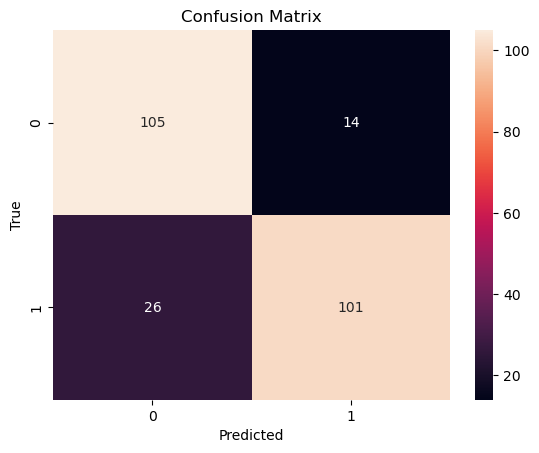

In [91]:
knn_mm3 = KNeighborsClassifier(n_neighbors=3)

#Entrenar el algoritmo
knn_mm3.fit(x_train,y_train)
predicciones = knn_mm3.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,predicciones).ravel()

labels = ["Benigno","Maligno"]
matriz = confusion_matrix(y_test,predicciones, labels=[0,1])
print(pd.DataFrame(matriz, index = labels, columns = labels))


print(tn, fp, fn, tp)
sb.heatmap(confusion_matrix(y_test,predicciones), annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(y_test,predicciones,target_names=clasificadores))

In [93]:
#BIRADS	Edad	Forma	Margen	Densidad
print(knn_mm3.predict([[4,65,3,5,3]]))
print(knn_mm3.predict_proba([[4,65,3,5,3]]))

[0]
[[0.66666667 0.33333333]]


C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
